# 주성분 분석

## PCA 클래스

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-12-10 12:06:50--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-12-10 12:06:50--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-12-10 12:06:51--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... c

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

,n_components,50
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [4]:
print(pca.components_.shape)

(50, 10000)


In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

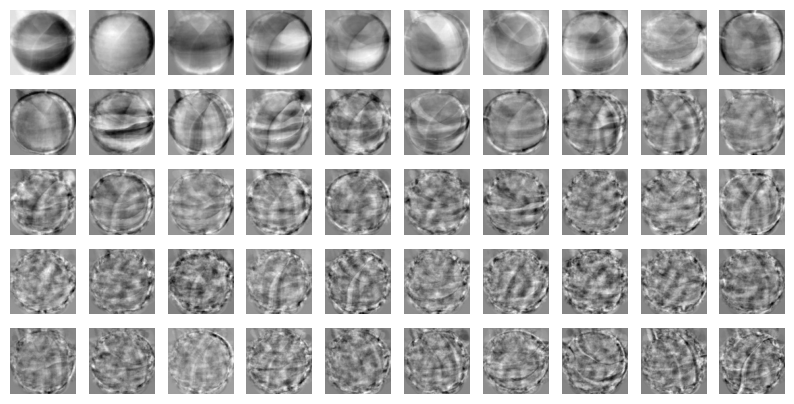

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [7]:
print(fruits_2d.shape)

(300, 10000)


In [8]:
fruits_pca = pca.transform(fruits_2d)

In [9]:
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

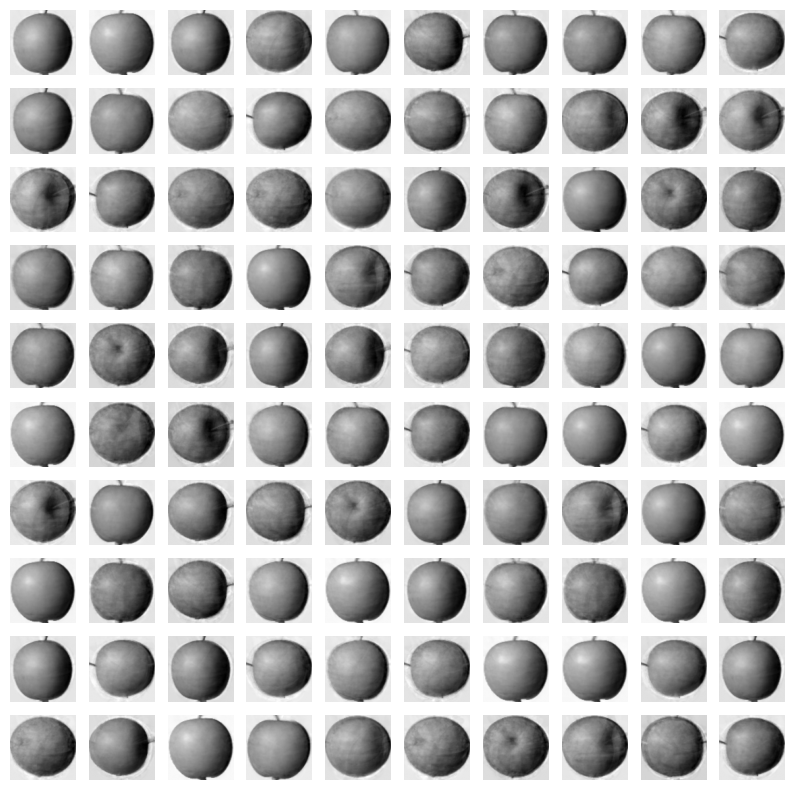

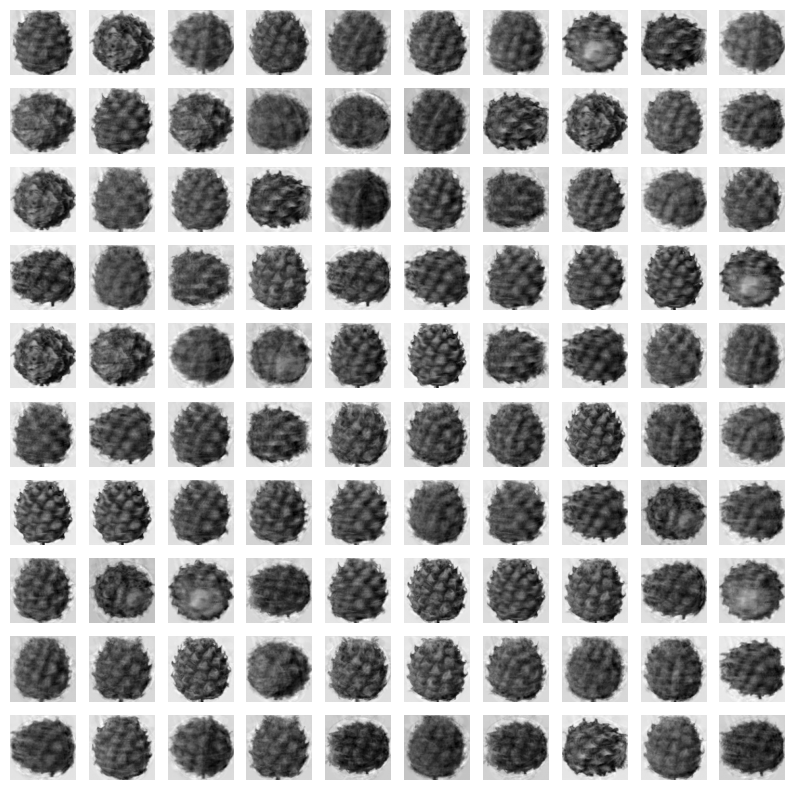

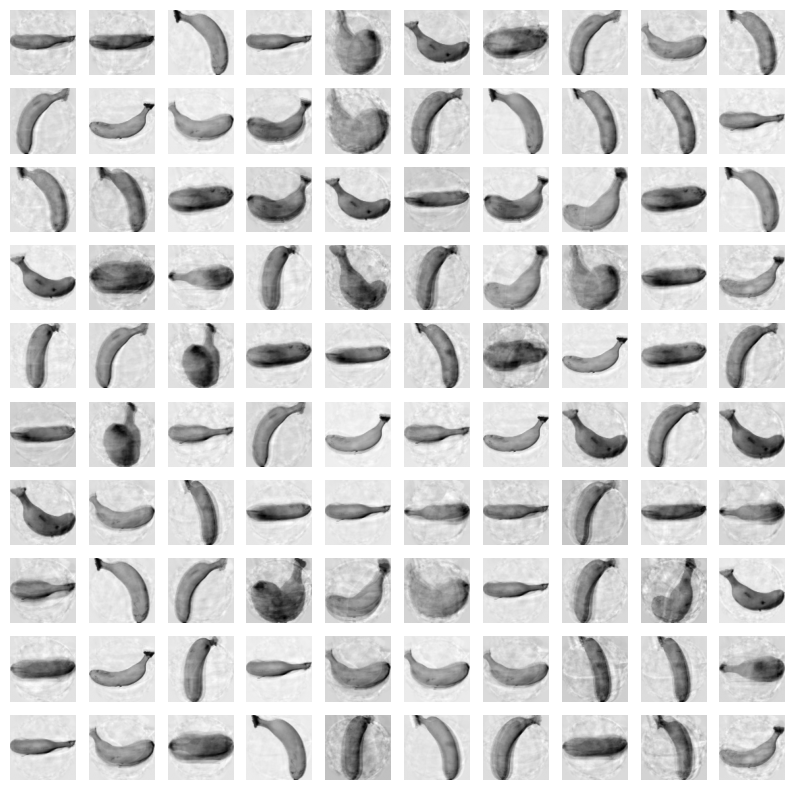

In [12]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

In [13]:
print(np.sum(pca.explained_variance_ratio_))

0.9215495946749842


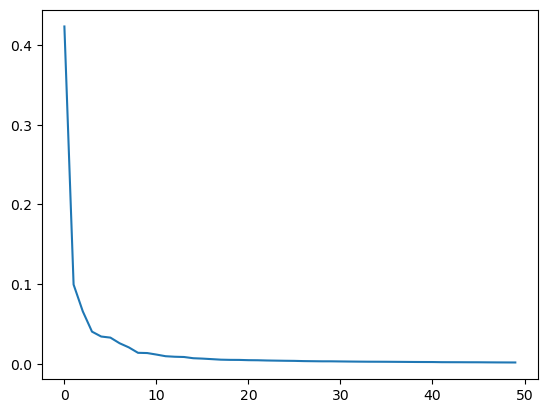

In [14]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

## 다른 알고리즘과 함께 사용하기

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [16]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [17]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.1403789520263672


In [18]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.009082412719726563


In [19]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

,n_components,0.5
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [20]:
print(pca.n_components_)

2


In [21]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [22]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.01681175231933594


/home/moonyj00/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/moonyj00/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.

In [23]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [24]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


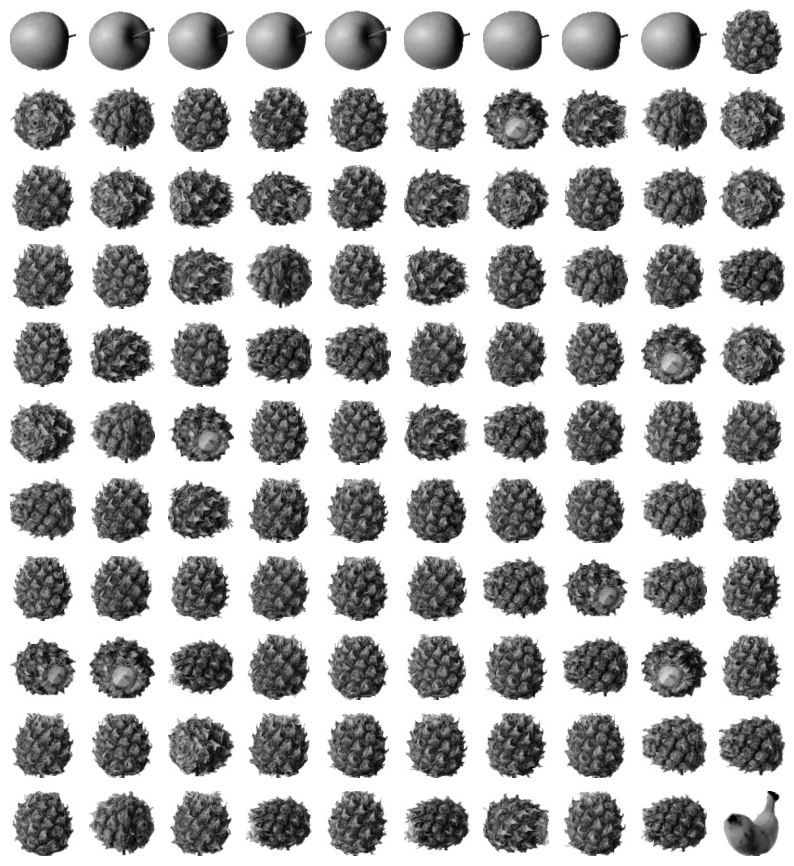

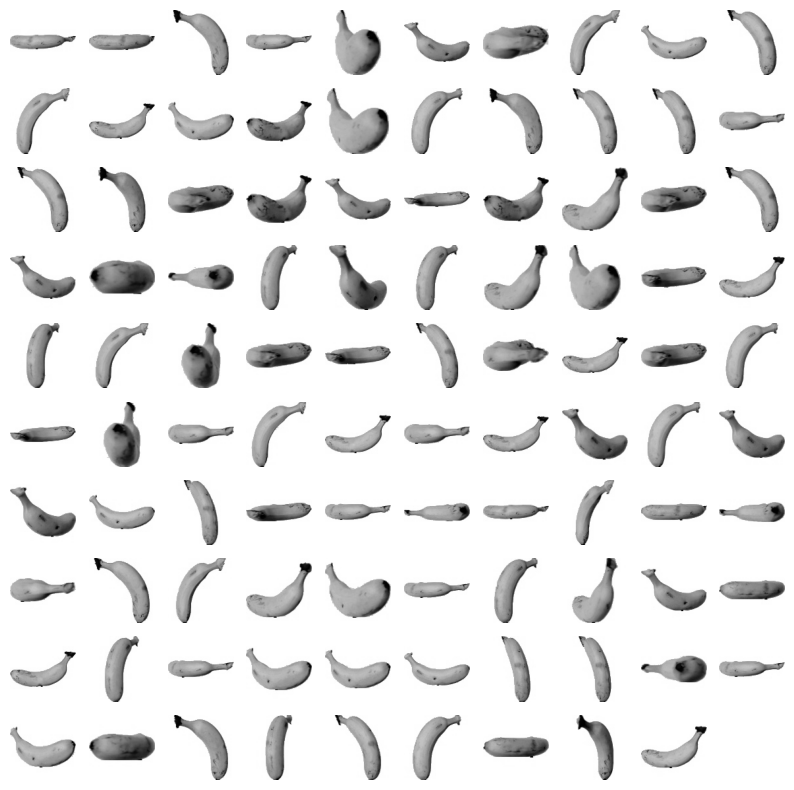

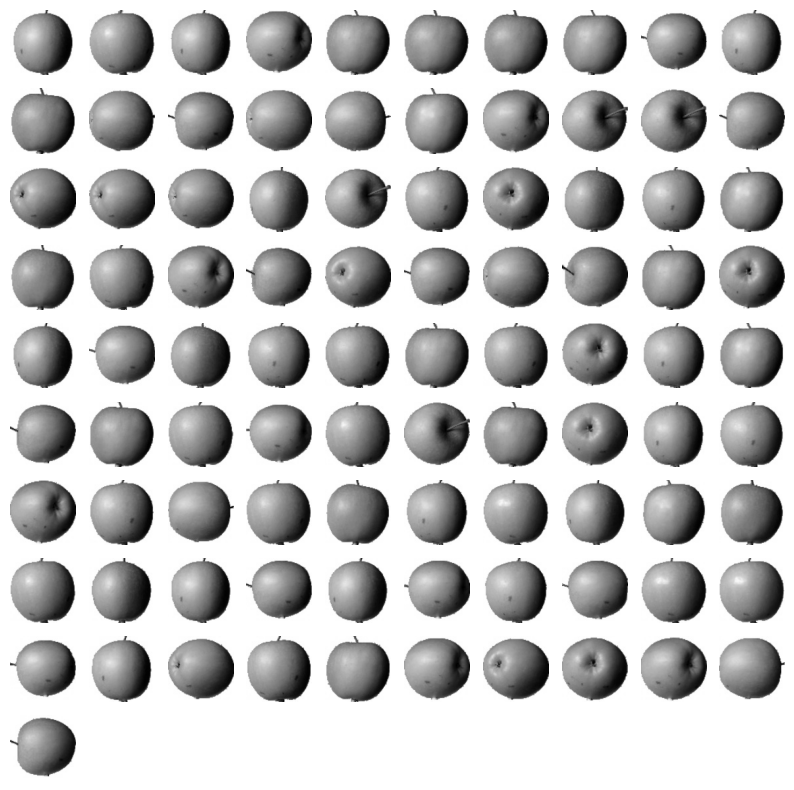

In [25]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

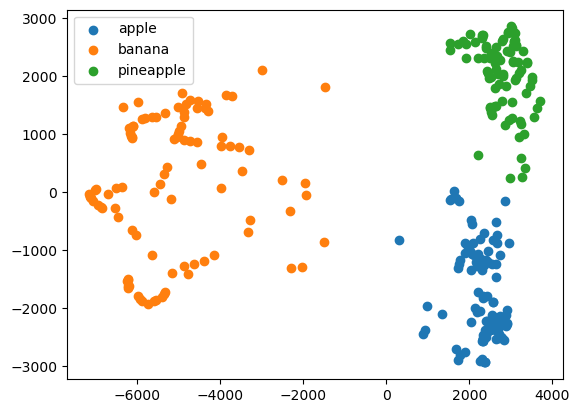

In [26]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

- 차원 축소
    - 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류
    - 저장 공간을 줄이고 시각화 하기 쉬움
    - 다른 알고리즘의 성능을 높힐 수도 있음
- 주성분 분석
    - 차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 방향을 찾는 방법
        - 이런 방향을 주성분이라고 부름
    - 원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있음
    - 일반적으로 주성분을 원본 데이터에 있는 특성 개수보다 작음
- 설명된 분산
    - 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나태내는지 기록한 것
    - 사이킷런의 PCA 클래스는 주성분 개수나 설명된 분산의 비율을 지정하여 주성분 분석을 수행할 수 있음.

### 핵심 패키지와 함수
- scikit-learn
    - PCA
        - 주성분 분석을 수행하는 클래스
        - n_components
            - 주성분의 개수를 지정
            - 기본값은 None
            - 샘플 개수가 특성 개수 중에 작은 것의 값을 사용
        - random_state
            - 넘파이 난수 시드 값을 지정할 수 있음
        - components_ 속성
            - 훈련 세트에서 찾은 주성분이 저장 됨
        - explained_variance_ 속성
            - 설명된 분산이 저장
        - explained_variance_ratio_ 속성
            - 설명된 분산의 비율이 저장
        - inverse_transform() 메서드
            - transform() 메서드 
                - 차원을 축소시킨 데이터를 다시 원본 차원으로 복원

### 확인 문제
1. 특성이 20개인 대량의 데이터 셋이 있습니다. 이 데이터셋에서 찾을 수 있는 주성분 개수는 몇 개 일까요?
    1. 10개
    2. 20개
    3. 50개
    4. 100개
    > 정답: 2

2. 샘플 개수가 1000개이고, 특성 개수는 100개인 데이터셋이 있습니다. 즉 이 데이터셋의 크기는 (1000, 100)입니다. 이 데이터를 사이킷런의 PCA 클래스를 사용해 10개의 주성분을 찾아 변환했습니다. 변환된 데이터셋의 크기는 얼마일까요?
    1. (100, 10)
    2. (10, 1000)
    3. (10, 10)
    4. (1000, 1000)
    > 정답: 1

3. 2번 문제에서 설명된 분산이 가장 큰 주성분은 몇 번째인가요?
    1. 첫 번째 주성분
    2. 다섯 번째 주성분
    3. 열 번째 주성분
    4. 알수 없음
    > 정답: 1

4. 사이킷런의 PCA 클래스에 대해 올바르게 설명한 것은 무엇인가요?
    1. 모델을 훈련한 후 새로운 샘플을 변환할 수 없습니다.
    2. 모델을 훈련한 후 새로운 샘플의 레이블을 예측할 수 있습니다.
    3. PCA로 변환된 데이터를 사용해 원본 데이터를 복원할 수 없습니다.
    4. 설명된 분산의 비율은 explained_variance_ratio_ 속성에 저장되어 있습니다.
    > 정답: 4